In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import re
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('CalomirisPritchett_data.csv')

In [4]:
pd.set_option('display.max_rows', 85)
pd.set_option('display.max_columns', 85)

In [5]:
data = data[data['ID number'].notna()]

In [6]:
data.head()

,ID number,Conveyance,Page,Researcher,Notary First Name,Notary Last Name,Sales Date,Sellers First Name,Sellers Last Name,Sellers County of Origin,Sellers State of Origin,Representing Seller,Relationship to Seller,Buyers First Name,Buyers Last Name,Buyers County of Origin,Buyers State of Origin,Representing Buyer,Relationship to Buyer,Slave Name,Sex,Age,Color,Occupation,Family Relationship,Name Child 1,Sex Child 1,Age Child 1,Name Child 2,Sex Child 2,Age Child 2,Name Child 3,Sex Child 3,Age Child 3,Name Child 4,Sex Child 4,Age Child 4,Name Child 5,Sex Child 5,Age Child 5,Name Child 6,Sex Child 6,Age Child 6,Name Child 7,Sex Child 7,Age Child 7,Name Child 8,Sex Child 8,Age Child 8,Guaranteed,Notes on Guarantee,Number of Total Slaves,Number of Adult Slaves,Number of Child Slaves,Number of Prices,Price,Payment Method,Payment flag,DUMMY credit,Down Payment,mthcred,Interest Rate,Discount Rate,predicted rate,Calculations,Ratio,PresentValue,DUMMY omission,Reason for Omission,Comments,DUMMY Estate Sale
0,1.0,70.0,348,MS,John French,Coffey,10/6/1856,Benjamin,Screws,.,AL,James Whitfield Bozeman,Agent,Maria,Hopson,.,.,.,.,Shadrack,M,40,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1.0,1.0,0.0,1.0,650,Cash,NaN,0.0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2.0,70.0,349,MS,William,Shannon,10/7/1856,Santiago,Galseran,New Orleans,LA,.,.,Peyton N.,Reynolds,New Orleans,LA,.,.,Jane,F,44,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1.0,1.0,0.0,1.0,550,Cash,NaN,0.0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,3.0,70.0,351,MS,Edward George,Gottschalk,10/1/1856,Pierre,Macou,New Orleans,LA,Jean Louis Moinet,Joint Seller,Heloise,Bagneris,New Orleans,LA,.,.,Helen,F,24,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1.0,1.0,0.0,1.0,1000,Cash,NaN,0.0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,4.0,70.0,352,MS,Paul Emile,Laresche,10/8/1856,Benjamin Franklin,Irby,Vanzand,TX,.,.,Francis,Dugue Jr.,Jefferson,LA,.,.,Jeff,M,23,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1.0,1.0,0.0,1.0,1400,Cash,NaN,0.0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,5.0,70.0,352,MS,George,Rareshide,10/8/1856,Richard,Condon,New Orleans,LA,.,.,Anthony,O'Dowd,New Orleans,LA,.,.,John,M,12,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1.0,1.0,0.0,1.0,700,Cash,NaN,0.0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14713 entries, 0 to 14712
Data columns (total 71 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID number                 14713 non-null  float64
 1   Conveyance                14713 non-null  float64
 2   Page                      14713 non-null  object 
 3   Researcher                14713 non-null  object 
 4   Notary First Name         14713 non-null  object 
 5   Notary Last Name          14713 non-null  object 
 6   Sales Date                14713 non-null  object 
 7   Sellers First Name        14713 non-null  object 
 8   Sellers Last Name         14701 non-null  object 
 9   Sellers County of Origin  14708 non-null  object 
 10  Sellers State of Origin   14711 non-null  object 
 11  Representing Seller       14577 non-null  object 
 12  Relationship to Seller    14574 non-null  object 
 13  Buyers First Name         14712 non-null  object 
 14  Buyers

In [8]:
clean_data=data.drop(data.columns[-15:], axis=1).drop(columns=['Conveyance', 'Page', 'Researcher','Notary First Name', 'Notary Last Name', 'Sellers County of Origin', 'Sellers State of Origin', 'Representing Seller', 'Relationship to Seller', 'Buyers County of Origin', 'Buyers State of Origin', 'Representing Buyer', 'Relationship to Buyer', 'Slave Name', 'Occupation', 'Family Relationship', 'Name Child 1', 'Name Child 2', 'Name Child 3', 'Name Child 4','Name Child 5', 'Name Child 6', 'Name Child 7', 'Name Child 8', 'Guaranteed', 'Notes on Guarantee', 'Number of Prices', 'Number of Total Slaves', 'Number of Adult Slaves', 'Number of Child Slaves'])

In [9]:
clean_data['Reason for Omission'] = data['Reason for Omission']

In [10]:
clean_data.head(10)

,ID number,Sales Date,Sellers First Name,Sellers Last Name,Buyers First Name,Buyers Last Name,Sex,Age,Color,Sex Child 1,Age Child 1,Sex Child 2,Age Child 2,Sex Child 3,Age Child 3,Sex Child 4,Age Child 4,Sex Child 5,Age Child 5,Sex Child 6,Age Child 6,Sex Child 7,Age Child 7,Sex Child 8,Age Child 8,Price,Reason for Omission
0,1.0,10/6/1856,Benjamin,Screws,Maria,Hopson,M,40,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,650,NaN
1,2.0,10/7/1856,Santiago,Galseran,Peyton N.,Reynolds,F,44,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,550,NaN
2,3.0,10/1/1856,Pierre,Macou,Heloise,Bagneris,F,24,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1000,NaN
3,4.0,10/8/1856,Benjamin Franklin,Irby,Francis,Dugue Jr.,M,23,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1400,NaN
4,5.0,10/8/1856,Richard,Condon,Anthony,O'Dowd,M,12,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,700,NaN
5,6.0,10/6/1856,Laurent,Roger,Polly,Courcelle,F,25,Mulatto,M,9,M,5,.,.,.,.,.,.,.,.,.,.,.,.,600,OMIT: Condition of emancipation
6,7.0,10/4/1856,Rosslynne Cumming,Vass,Henry T.,Lownsdale,F,23,Mulatto,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1650,NaN
7,8.0,10/20/1856,Polly,Reason,Harriett,Falkner,M,50,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1200,OMIT: Group sale
8,9.0,10/20/1856,Polly,Reason,Harriett,Falkner,F,48,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,NaN,OMIT: Group sale
9,10.0,11/8/1856,Archibald,Lilly,Jacob,Van Winckle,M,20,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1225,NaN


In [11]:
def strip_data(data):
    data_type = type(data)    
    return data_type(str(data).strip())

In [12]:
def change_type(data):
    if type(data) != float or type(data) != int:
        try:
            return float(data)
        except ValueError:
            return float()

In [13]:
def clean_space(data):
    if re.search(r'\s+', str(data)):
        return re.sub(r'\s+', '', str(data))
    return data

In [14]:
def count_total_slaves(df):
    for index, row in df.iterrows():
        count = 1
        for child in col_list:
            if row[child] != -1:
                count += 1
            else:
                pass
        df.loc[index, 'Slaves Total'] = count
        df.loc[index, 'Children Total'] = count - 1
        count = 1

In [15]:
col_list = ['Age Child 1', 'Age Child 2', 'Age Child 3', 'Age Child 4', 'Age Child 5', 'Age Child 6', 'Age Child 7', 'Age Child 8']

In [16]:
clean_data['Age'] = clean_data['Age'].apply(strip_data).apply(change_type)

In [17]:
clean_data[col_list] = clean_data[col_list].replace(".", "").fillna(int(-1))

In [18]:
for col in col_list:   
    clean_data[col] = clean_data[col].apply(change_type)

In [19]:
clean_data['Slaves Total'] = float()

In [20]:
clean_data.reset_index(inplace=True)

In [21]:
clean_data.drop(columns='index', inplace=True)

In [22]:
clean_data.set_index('ID number', inplace=True)

In [23]:
clean_data

,Sales Date,Sellers First Name,Sellers Last Name,Buyers First Name,Buyers Last Name,Sex,Age,Color,Sex Child 1,Age Child 1,Sex Child 2,Age Child 2,Sex Child 3,Age Child 3,Sex Child 4,Age Child 4,Sex Child 5,Age Child 5,Sex Child 6,Age Child 6,Sex Child 7,Age Child 7,Sex Child 8,Age Child 8,Price,Reason for Omission,Slaves Total
ID number,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,10/6/1856,Benjamin,Screws,Maria,Hopson,M,40.0,.,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,650,NaN,0.0
2.0,10/7/1856,Santiago,Galseran,Peyton N.,Reynolds,F,44.0,Negro,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,550,NaN,0.0
3.0,10/1/1856,Pierre,Macou,Heloise,Bagneris,F,24.0,Negro,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,1000,NaN,0.0
4.0,10/8/1856,Benjamin Franklin,Irby,Francis,Dugue Jr.,M,23.0,Negro,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,1400,NaN,0.0
5.0,10/8/1856,Richard,Condon,Anthony,O'Dowd,M,12.0,Negro,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,700,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15321.0,8/3/1861,Nywatt C.,Cutler,Matthew Jules,Bujac,F,25.0,Mulatto,M,8.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,1100,NaN,0.0
15370.0,5/7/1861,John G.,Chadwick,Sarah Ann,Chadwick,F,24.0,Negro,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,1600,OMIT: Group sale,0.0
15371.0,5/7/1861,John G.,Chadwick,Sarah Ann,Chadwick,.,1.0,.,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,NaN,OMIT: Group sale,0.0


In [24]:
clean_data[col_list] = clean_data[col_list].replace(0, -1)

In [25]:
count_total_slaves(clean_data)

In [26]:
clean_data['Slaves Total'].sum()

16941.0

In [27]:
data['ID number'].count()

14713

In [28]:
clean_data['Slaves Total'].sum() - data['ID number'].count()

2228.0

**16,941 slaves were sold in total: 14,713 adult slaves and 2,228 children.**

In [29]:
clean_data[col_list] = clean_data[col_list].replace(-1, float())

In [30]:
clean_data.reset_index(inplace=True)

In [31]:
def clean_double_spaces(data):
    if re.search(r'\s{2,}', str(data)):
        return re.sub(r'\s{2,}', ' ', str(data))
    return data

In [32]:
clean_data['Sellers First Name'] = clean_data['Sellers First Name'].apply(clean_double_spaces)
clean_data['Sellers Last Name'] = clean_data['Sellers Last Name'].apply(clean_double_spaces)
clean_data['Buyers First Name'] = clean_data['Buyers First Name'].apply(clean_double_spaces)
clean_data['Buyers Last Name'] = clean_data['Buyers Last Name'].apply(clean_double_spaces)

In [33]:
full_name=clean_data['Sellers First Name'] + " " + clean_data['Sellers Last Name']
f_name=clean_data['Buyers First Name'] + " " + clean_data['Buyers Last Name']

In [34]:
clean_data

,ID number,Sales Date,Sellers First Name,Sellers Last Name,Buyers First Name,Buyers Last Name,Sex,Age,Color,Sex Child 1,Age Child 1,Sex Child 2,Age Child 2,Sex Child 3,Age Child 3,Sex Child 4,Age Child 4,Sex Child 5,Age Child 5,Sex Child 6,Age Child 6,Sex Child 7,Age Child 7,Sex Child 8,Age Child 8,Price,Reason for Omission,Slaves Total,Children Total
0,1.0,10/6/1856,Benjamin,Screws,Maria,Hopson,M,40.0,.,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,650,NaN,1.0,0.0
1,2.0,10/7/1856,Santiago,Galseran,Peyton N.,Reynolds,F,44.0,Negro,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,550,NaN,1.0,0.0
2,3.0,10/1/1856,Pierre,Macou,Heloise,Bagneris,F,24.0,Negro,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,1000,NaN,1.0,0.0
3,4.0,10/8/1856,Benjamin Franklin,Irby,Francis,Dugue Jr.,M,23.0,Negro,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,1400,NaN,1.0,0.0
4,5.0,10/8/1856,Richard,Condon,Anthony,O'Dowd,M,12.0,Negro,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,700,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14708,15321.0,8/3/1861,Nywatt C.,Cutler,Matthew Jules,Bujac,F,25.0,Mulatto,M,8.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,1100,NaN,2.0,1.0
14709,15370.0,5/7/1861,John G.,Chadwick,Sarah Ann,Chadwick,F,24.0,Negro,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,1600,OMIT: Group sale,1.0,0.0
14710,15371.0,5/7/1861,John G.,Chadwick,Sarah Ann,Chadwick,.,1.0,.,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,NaN,OMIT: Group sale,1.0,0.0
14711,15372.0,5/7/1861,John G.,Chadwick,Sarah Ann,Chadwick,F,46.0,Negro,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,NaN,OMIT: Group sale,1.0,0.0


In [35]:
clean_data=clean_data.drop(clean_data.columns[2:6], axis=1)

In [36]:
clean_data

,ID number,Sales Date,Sex,Age,Color,Sex Child 1,Age Child 1,Sex Child 2,Age Child 2,Sex Child 3,Age Child 3,Sex Child 4,Age Child 4,Sex Child 5,Age Child 5,Sex Child 6,Age Child 6,Sex Child 7,Age Child 7,Sex Child 8,Age Child 8,Price,Reason for Omission,Slaves Total,Children Total
0,1.0,10/6/1856,M,40.0,.,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,650,NaN,1.0,0.0
1,2.0,10/7/1856,F,44.0,Negro,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,550,NaN,1.0,0.0
2,3.0,10/1/1856,F,24.0,Negro,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,1000,NaN,1.0,0.0
3,4.0,10/8/1856,M,23.0,Negro,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,1400,NaN,1.0,0.0
4,5.0,10/8/1856,M,12.0,Negro,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,700,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14708,15321.0,8/3/1861,F,25.0,Mulatto,M,8.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,1100,NaN,2.0,1.0
14709,15370.0,5/7/1861,F,24.0,Negro,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,1600,OMIT: Group sale,1.0,0.0
14710,15371.0,5/7/1861,.,1.0,.,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,NaN,OMIT: Group sale,1.0,0.0
14711,15372.0,5/7/1861,F,46.0,Negro,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,NaN,OMIT: Group sale,1.0,0.0


In [37]:
clean_data.insert(2, 'Sellers Full Name', full_name, True)
clean_data.insert(3, 'Buyers Full Name', f_name, True)

In [38]:
clean_data['Sellers Full Name'].value_counts()[:5]

Bernard Moore Campbell    900
Jeremiah Smith            562
Jonathan Means Wilson     288
Joseph Bruin              232
Bernard Kendig            204
Name: Sellers Full Name, dtype: int64

**Most of the slaves were sold by Bernard Moore Campbell - 900 adult slaves in total.** 

In [39]:
clean_data['Buyers Full Name'].value_counts()[:5]

Henry Doyal                159
John L. Manning            154
Lewis Neville Shelton      124
George F. C. Bachelder     113
William Jackson Maynard     75
Name: Buyers Full Name, dtype: int64

**Most of the slaves were bought by Henry Doyal and John L. Manning - each about 150 adult slaves in total.** 

In [40]:
clean_data['Color'] = clean_data['Color'].apply(strip_data).apply(clean_double_spaces)

In [41]:
clean_data['Color'].value_counts()[:10]

Negro           8725
.               2253
Mulatto         1579
Griff           1328
Black            349
Dark Griff       118
Yellow            64
Dark              39
Creole Negro      36
Quarteroon        29
Name: Color, dtype: int64

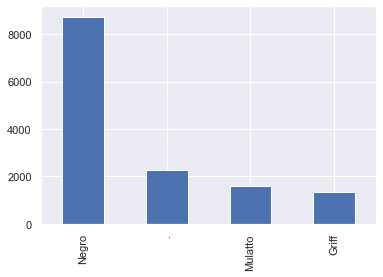

In [42]:
sns.set(style='darkgrid')
clean_data['Color'].value_counts()[:4].plot(kind="bar")
plt.show()

**Negro is the most popular skin color among slaves - 8,725 adult slaves.**

In [43]:
clean_data['Price'] = clean_data['Price'].apply(change_type)

In [44]:
clean_data['Sales Date'].replace(".", "", inplace=True)

In [45]:
clean_data['Sales Date'] = pd.to_datetime(clean_data['Sales Date'])

In [46]:
clean_data['Sales Date'].min()

Timestamp('1829-04-30 00:00:00')

In [47]:
clean_data['Sales Date'].max()

Timestamp('1861-09-03 00:00:00')

In [48]:
clean_data

,ID number,Sales Date,Sellers Full Name,Buyers Full Name,Sex,Age,Color,Sex Child 1,Age Child 1,Sex Child 2,Age Child 2,Sex Child 3,Age Child 3,Sex Child 4,Age Child 4,Sex Child 5,Age Child 5,Sex Child 6,Age Child 6,Sex Child 7,Age Child 7,Sex Child 8,Age Child 8,Price,Reason for Omission,Slaves Total,Children Total
0,1.0,1856-10-06,Benjamin Screws,Maria Hopson,M,40.0,.,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,650.0,NaN,1.0,0.0
1,2.0,1856-10-07,Santiago Galseran,Peyton N. Reynolds,F,44.0,Negro,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,550.0,NaN,1.0,0.0
2,3.0,1856-10-01,Pierre Macou,Heloise Bagneris,F,24.0,Negro,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,1000.0,NaN,1.0,0.0
3,4.0,1856-10-08,Benjamin Franklin Irby,Francis Dugue Jr.,M,23.0,Negro,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,1400.0,NaN,1.0,0.0
4,5.0,1856-10-08,Richard Condon,Anthony O'Dowd,M,12.0,Negro,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,700.0,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14708,15321.0,1861-08-03,Nywatt C. Cutler,Matthew Jules Bujac,F,25.0,Mulatto,M,8.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,1100.0,NaN,2.0,1.0
14709,15370.0,1861-05-07,John G. Chadwick,Sarah Ann Chadwick,F,24.0,Negro,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,1600.0,OMIT: Group sale,1.0,0.0
14710,15371.0,1861-05-07,John G. Chadwick,Sarah Ann Chadwick,.,1.0,.,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,NaN,OMIT: Group sale,1.0,0.0
14711,15372.0,1861-05-07,John G. Chadwick,Sarah Ann Chadwick,F,46.0,Negro,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,.,0.0,NaN,OMIT: Group sale,1.0,0.0


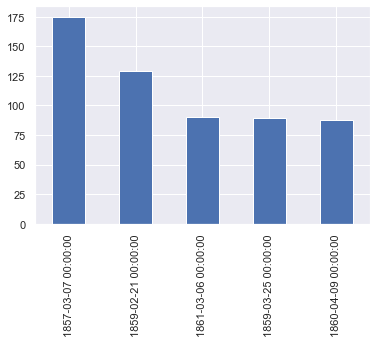

In [49]:
clean_data['Sales Date'].value_counts()[:5].plot(kind="bar")
plt.show()

In [50]:
clean_data['Sales Date'].value_counts()[:5]

1857-03-07    175
1859-02-21    129
1861-03-06     90
1859-03-25     89
1860-04-09     88
Name: Sales Date, dtype: int64

**Most of adult slaves were sold on March 7, 1857 - 175 in total.**

In [51]:
clean_data['Price'].sum()

15902519.628

In [52]:
clean_data['Price'].max()

96500.0

**Slaves were sold for 15,902,519.63 USD during the period from 1829-04-30 to 1861-09-03. The biggest price for one transaction was 96,500.00 USD.**

In [53]:
sex_cols = ['Sex Child 1', 'Sex Child 2', 'Sex Child 3', 'Sex Child 4', 'Sex Child 5', 'Sex Child 6', 'Sex Child 7', 'Sex Child 8']

In [54]:
clean_data[sex_cols] = clean_data[sex_cols].replace(".", np.nan)

In [55]:
s_table = clean_data[sex_cols].apply(pd.Series.value_counts)

In [56]:
s_table = s_table["F":"M"][:]

In [57]:
s_table['Total'] = s_table.loc[:, :].sum(axis=1)

In [58]:
s_table

,Sex Child 1,Sex Child 2,Sex Child 3,Sex Child 4,Sex Child 5,Sex Child 6,Sex Child 7,Sex Child 8,Total
F,700,256,120,35,15,5,1.0,NaN,1132.0
M,601,252,87,42,10,1,NaN,NaN,993.0


**Most of slaves had one child.
1,132 girls and 993 boys in total.**

In [59]:
g_table = clean_data[col_list]

In [60]:
g_table = g_table[col_list].replace(".", "").fillna(int())

In [61]:
for col in col_list:
     g_table[col] = g_table[col].apply(change_type)

In [62]:
g_table['Mean'] = g_table.loc[:, :].mean(axis=1)

In [63]:
g_table['Mean'].min()

0.0

In [64]:
g_table['Mean'].max()

11.25

In [65]:
def get_age_chart(column):
    age = g_table[g_table[column]!=0]
    age[column].plot.hist()

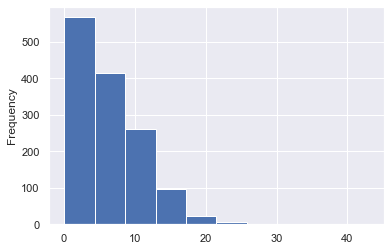

In [66]:
get_age_chart('Age Child 1')

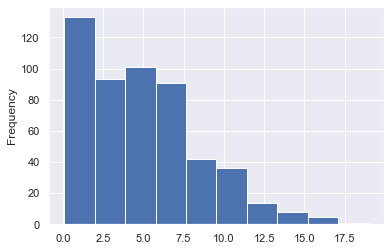

In [67]:
get_age_chart('Age Child 2')

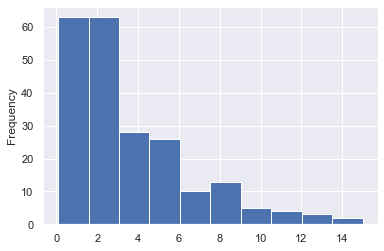

In [68]:
get_age_chart('Age Child 3')

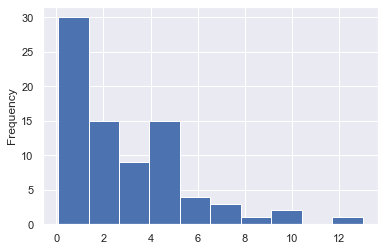

In [69]:
get_age_chart('Age Child 4')

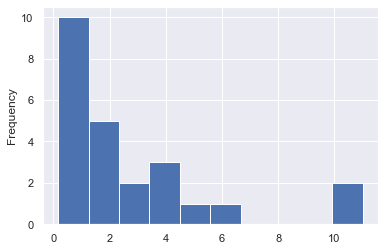

In [70]:
get_age_chart('Age Child 5')

**The biggest age mean of one family children was 11.25, the smallest mean was 0 year.**

**Most of the children were under 5 years old.**

In [71]:
clean_data = clean_data.drop(columns=col_list)

In [72]:
clean_data = clean_data.join(g_table).drop(columns=['Mean'])

In [73]:
clean_data

,ID number,Sales Date,Sellers Full Name,Buyers Full Name,Sex,Age,Color,Sex Child 1,Sex Child 2,Sex Child 3,Sex Child 4,Sex Child 5,Sex Child 6,Sex Child 7,Sex Child 8,Price,Reason for Omission,Slaves Total,Children Total,Age Child 1,Age Child 2,Age Child 3,Age Child 4,Age Child 5,Age Child 6,Age Child 7,Age Child 8
0,1.0,1856-10-06,Benjamin Screws,Maria Hopson,M,40.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,650.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1856-10-07,Santiago Galseran,Peyton N. Reynolds,F,44.0,Negro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1856-10-01,Pierre Macou,Heloise Bagneris,F,24.0,Negro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,1856-10-08,Benjamin Franklin Irby,Francis Dugue Jr.,M,23.0,Negro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1400.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,1856-10-08,Richard Condon,Anthony O'Dowd,M,12.0,Negro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,700.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14708,15321.0,1861-08-03,Nywatt C. Cutler,Matthew Jules Bujac,F,25.0,Mulatto,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1100.0,NaN,2.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14709,15370.0,1861-05-07,John G. Chadwick,Sarah Ann Chadwick,F,24.0,Negro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1600.0,OMIT: Group sale,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14710,15371.0,1861-05-07,John G. Chadwick,Sarah Ann Chadwick,.,1.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OMIT: Group sale,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14711,15372.0,1861-05-07,John G. Chadwick,Sarah Ann Chadwick,F,46.0,Negro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OMIT: Group sale,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
clean_data['Age'][clean_data['Age']!="."].mean()

25.261044567249957

**The average age of adult slaves was 25 years.**

In [75]:
clean_data = clean_data.replace(".", None)

In [76]:
clean_data['Sex'] = clean_data['Sex'].apply(strip_data)

In [77]:
sex_dummy = pd.get_dummies(clean_data['Sex'])

In [78]:
dummies = pd.get_dummies(clean_data[sex_cols])

In [79]:
clean_data = pd.concat([clean_data, sex_dummy], axis=1)

In [80]:
clean_data = pd.concat([clean_data, dummies], axis=1)

In [81]:
clean_data.drop(sex_cols, axis=1, inplace=True)

In [82]:
clean_data.drop(['Sex'], axis=1, inplace=True)

In [83]:
clean_data.tail(50)

,ID number,Sales Date,Sellers Full Name,Buyers Full Name,Age,Color,Price,Reason for Omission,Slaves Total,Children Total,Age Child 1,Age Child 2,Age Child 3,Age Child 4,Age Child 5,Age Child 6,Age Child 7,Age Child 8,F,M,Sex Child 1_F,Sex Child 1_M,Sex Child 2_F,Sex Child 2_M,Sex Child 3_F,Sex Child 3_M,Sex Child 4_F,Sex Child 4_M,Sex Child 5_F,Sex Child 5_M,Sex Child 6_F,Sex Child 6_M,Sex Child 7_F
14663,15168.0,1861-06-25,Joseph M. Walker,Lorenzo Post,24.0,Negro,5400.0,OMIT: Missing info: price. Price includes prop...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
14664,15169.0,1861-06-24,John Cochran Huey Jr.,Joseph O'Brien,27.0,Negro,585.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
14665,15170.0,1861-06-26,Pierre Masich,Marcelin Pecora,11.0,Griff,570.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14666,15171.0,1861-06-25,Theodore A. Marvel,James Theodore Anderson,16.0,Griff,950.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14667,15172.0,1861-06-29,Jean Baptiste Preau,Amedee Couturie,40.0,Negro,400.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
14668,15173.0,1861-06-29,William Sandford Harrison,M. A. R. Harrison,38.0,Negro,350.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14669,15174.0,1861-06-29,William Sandford Harrison,M. A. R. Harrison,51.0,Negro,550.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
14670,15175.0,1861-06-19,Leonard Fash,Augustus Miller,36.0,Negro,1000.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
14671,15176.0,1861-07-07,Andrew Edmund Lassalle,Elize Grenaier Roquest,13.5,Negro,800.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
14672,15177.0,1861-06-05,B. J. Coons,Joseph McIntyre French,20.0,Black,775.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
clean_data['F'].value_counts()

1    7658
0    7055
Name: F, dtype: int64

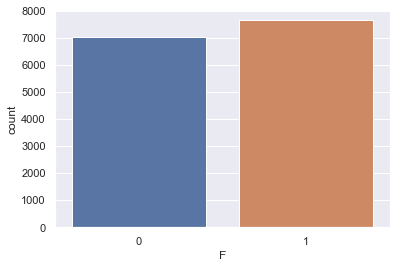

In [85]:
sns.countplot(x="F", data=clean_data)

**7,630 females and 7,083 males were among adult slaves.**

In [86]:
len(clean_data['Color'].unique())

35

In [87]:
color_dummy = pd.get_dummies(clean_data['Color'])

In [88]:
clean_data = pd.concat([clean_data, color_dummy], axis=1)

In [89]:
clean_data.drop(['Color'], axis=1, inplace=True)

In [90]:
filtered_data = clean_data

In [91]:
filtered_data.reset_index()

,index,ID number,Sales Date,Sellers Full Name,Buyers Full Name,Age,Price,Reason for Omission,Slaves Total,Children Total,Age Child 1,Age Child 2,Age Child 3,Age Child 4,Age Child 5,Age Child 6,Age Child 7,Age Child 8,F,M,Sex Child 1_F,Sex Child 1_M,Sex Child 2_F,Sex Child 2_M,Sex Child 3_F,Sex Child 3_M,Sex Child 4_F,Sex Child 4_M,Sex Child 5_F,Sex Child 5_M,Sex Child 6_F,Sex Child 6_M,Sex Child 7_F,.,"Albino, Negro",Black,Black Negro,Bright Color,Bright Mulatto,Brown,Chestnut,Colored,Copper,Creole,Creole Mulatto,Creole Negro,Dark,Dark Copper,Dark Griff,Dark Mulatto,Dark Negro,"Dark Orange, Griff",Fair Mulatto,Griff,Griff Creole,Light,Light Black,Light Brown,Light Griff,Light Mulatto,Light Negro,Mulatto,"Mulatto, Griff",Negro,Quarteroon,Yellow,"Yellow, Griff"
0,0,1.0,1856-10-06,Benjamin Screws,Maria Hopson,40.0,650.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2.0,1856-10-07,Santiago Galseran,Peyton N. Reynolds,44.0,550.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,3.0,1856-10-01,Pierre Macou,Heloise Bagneris,24.0,1000.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,3,4.0,1856-10-08,Benjamin Franklin Irby,Francis Dugue Jr.,23.0,1400.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4,5.0,1856-10-08,Richard Condon,Anthony O'Dowd,12.0,700.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14708,14708,15321.0,1861-08-03,Nywatt C. Cutler,Matthew Jules Bujac,25.0,1100.0,NaN,2.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
14709,14709,15370.0,1861-05-07,John G. Chadwick,Sarah Ann Chadwick,24.0,1600.0,OMIT: Group sale,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
14710,14710,15371.0,1861-05-07,John G. Chadwick,Sarah Ann Chadwick,1.0,NaN,OMIT: Group sale,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
14711,14711,15372.0,1861-05-07,John G. Chadwick,Sarah Ann Chadwick,46.0,NaN,OMIT: Group sale,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [92]:
filtered_data['Price'].isnull().sum()

2506

In [93]:
filtered_data['Price'].fillna(-1, inplace=True)

In [94]:
last_index = int(filtered_data.tail(1).index.item())

In [95]:
def calc_mean():
    full_price = 0
    slaves_id = []
    for data in filtered_data['Price'].items():
        price = filtered_data.loc[data[0], 'Price']
        prev = data[0] - 1
        if price == -1:
            full_price = filtered_data.loc[prev, 'Price']
            slaves_id.append(data[0])
            slaves_id.append(prev)
            nxt = data[0] + 1
            while price == -1:
                try:
                    price = filtered_data.loc[nxt, 'Price']
                except KeyError:
                    price = 0
                if price == -1:
                    slaves_id.append(nxt)
                    nxt += 1
                else:
                    pass

        if len(slaves_id) > 0:
            mean = round(full_price / len(slaves_id), 2)
            for sl in slaves_id:
                filtered_data.loc[sl, 'Price'] = mean
        full_price = 0
        slaves_id = []              
              
    

In [96]:
calc_mean()

In [97]:
filtered_data

,ID number,Sales Date,Sellers Full Name,Buyers Full Name,Age,Price,Reason for Omission,Slaves Total,Children Total,Age Child 1,Age Child 2,Age Child 3,Age Child 4,Age Child 5,Age Child 6,Age Child 7,Age Child 8,F,M,Sex Child 1_F,Sex Child 1_M,Sex Child 2_F,Sex Child 2_M,Sex Child 3_F,Sex Child 3_M,Sex Child 4_F,Sex Child 4_M,Sex Child 5_F,Sex Child 5_M,Sex Child 6_F,Sex Child 6_M,Sex Child 7_F,.,"Albino, Negro",Black,Black Negro,Bright Color,Bright Mulatto,Brown,Chestnut,Colored,Copper,Creole,Creole Mulatto,Creole Negro,Dark,Dark Copper,Dark Griff,Dark Mulatto,Dark Negro,"Dark Orange, Griff",Fair Mulatto,Griff,Griff Creole,Light,Light Black,Light Brown,Light Griff,Light Mulatto,Light Negro,Mulatto,"Mulatto, Griff",Negro,Quarteroon,Yellow,"Yellow, Griff"
0,1.0,1856-10-06,Benjamin Screws,Maria Hopson,40.0,650.00,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.0,1856-10-07,Santiago Galseran,Peyton N. Reynolds,44.0,550.00,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3.0,1856-10-01,Pierre Macou,Heloise Bagneris,24.0,1000.00,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4.0,1856-10-08,Benjamin Franklin Irby,Francis Dugue Jr.,23.0,1400.00,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5.0,1856-10-08,Richard Condon,Anthony O'Dowd,12.0,700.00,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14708,15321.0,1861-08-03,Nywatt C. Cutler,Matthew Jules Bujac,25.0,1100.00,NaN,2.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
14709,15370.0,1861-05-07,John G. Chadwick,Sarah Ann Chadwick,24.0,533.33,OMIT: Group sale,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
14710,15371.0,1861-05-07,John G. Chadwick,Sarah Ann Chadwick,1.0,533.33,OMIT: Group sale,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
14711,15372.0,1861-05-07,John G. Chadwick,Sarah Ann Chadwick,46.0,533.33,OMIT: Group sale,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [98]:
filtered_data = filtered_data[filtered_data['Age'].notna()]

In [99]:
main_table = filtered_data[['Sales Date', 'Price', 'Slaves Total', 'F', 'M', 'Children Total']].groupby(['Sales Date']).sum().sort_values('Price', ascending=False)

In [100]:
main_table['Avg Price'] = main_table['Price'] / main_table['Slaves Total']

In [101]:
main_table = main_table.sort_values('Sales Date', ascending=True)

In [102]:
main_table.sort_values('Price', ascending=False)[:10]

,Price,Slaves Total,F,M,Children Total,Avg Price
Sales Date,,,,,,
1857-03-07,120740.62,184.0,96,79,9.0,656.199022
1859-11-25,102513.66,69.0,21,46,2.0,1485.705217
1860-04-09,89625.00,88.0,40,48,0.0,1018.465909
1860-02-25,89191.43,19.0,10,8,1.0,4694.285789
1859-05-16,84330.16,83.0,41,39,3.0,1016.026024
1859-01-20,82549.93,82.0,41,40,1.0,1006.706463
1859-03-28,79186.86,78.0,41,37,0.0,1015.216154
1859-03-25,78235.75,89.0,41,48,0.0,879.053371
1859-03-31,73955.00,85.0,44,35,6.0,870.058824


**The biggest transaction was on 7 March, 1857: 79 men, 96 women and 9 children were sold for 120,740.62 USD.**

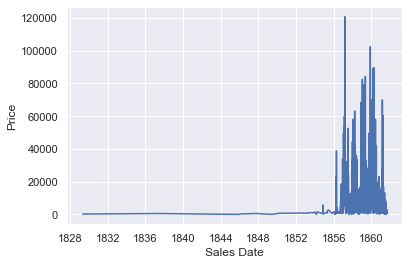

In [103]:
sns.lineplot(data=main_table.reset_index(), x="Sales Date", y="Price")

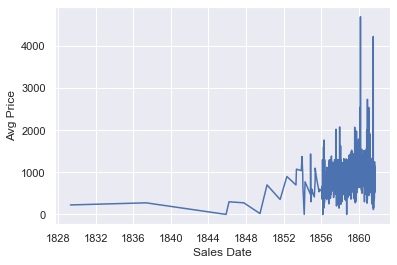

In [104]:
sns.lineplot(data=main_table.reset_index(), x="Sales Date", y='Avg Price')

In [105]:
main_table[main_table['Avg Price'] > 2000].sort_values('Avg Price', ascending=False)

,Price,Slaves Total,F,M,Children Total,Avg Price
Sales Date,,,,,,
1860-02-25,89191.43,19.0,10,8,1.0,4694.285789
1861-07-06,8450.00,2.0,1,1,0.0,4225.000000
1860-11-22,16400.00,6.0,4,2,0.0,2733.333333
1860-02-15,38220.00,15.0,6,9,0.0,2548.000000
1861-01-11,12704.79,5.0,3,2,0.0,2540.958000
1861-01-02,7316.66,3.0,1,2,0.0,2438.886667
1861-06-25,6800.00,3.0,2,1,0.0,2266.666667
1861-01-10,12674.00,6.0,3,3,0.0,2112.333333
1857-12-09,33236.00,16.0,2,14,0.0,2077.250000


In [106]:
round(main_table['Price'].sum() / main_table['Slaves Total'].sum(), 2)

938.84

**Average price was about 940 USD for one slave. The highest average price was 4,694 USD on February 25, 1860.**

In [107]:
training_data=filtered_data.drop(columns=['Sales Date', 'Sellers Full Name', 'Buyers Full Name', 'Reason for Omission'])

In [108]:
with open('cleaned_data.pkl', 'wb') as pickle_out:
    pickle.dump(training_data, pickle_out)